In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from ISLP import load_data

In [8]:
adf = load_data('Advertising').drop(columns=['Unnamed: 0'])
adf

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


#### Estimating the coefficients

let ($x_1$, $y_1$), ($x_2$, $y_2$), .... ($x_n$, $y_n$) represent n observation pairs

$\hat{y}_i = \hat{\beta_0} + \hat{\beta_1} x_i$ be the prediction of $Y$ based on the $i^{th}$ value of $X$

$e_{i} = y_{i} - \hat{y_{i}}$ represents the $i^{th}$ residual

Residual sum of squares(RSS) = $e_{1}^2$ + $e_{2}^2$ + ..... + $e_{n}^2$

least square approach chooses $\hat{\beta_0}$ and $\hat{\beta_1}$ to minimize RSS


$$
\hat f(\hat{\beta_0},\hat{\beta_1})
  \;=\;
  \min_{\hat{\beta_0},\hat{\beta_1}}\;
  \sum_{i=1}^{n}\bigl(y_i - \hat{\beta_0} - \hat{\beta_1} x_i\bigr)^2
$$

The minimum occurs where the partial derivatives vanish:

$$
\frac{\partial f}{\partial \hat{\beta_k}}=0,
\qquad k\in\{0,1\}.
$$

Explicitly,

$$
\begin{cases}
\displaystyle
\frac{\partial f}{\partial \hat{\beta_0}}
= -2\sum_{i=1}^{n}\bigl(y_i-\hat{\beta_0}-\hat{\beta_1} x_i\bigr)=0,\\[10pt]
\displaystyle
\frac{\partial f}{\partial \hat{\beta_1}}
= -2\sum_{i=1}^{n}x_i\bigl(y_i-\hat{\beta_0}-\hat{\beta_1} x_i\bigr)=0.
\end{cases}
$$

Solving this, 

$$
\hat{\beta_1} = \frac{\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n}(x_i - \bar{x})^2}
$$

$$
\hat{\beta_0} = \bar{y} - \hat{\beta_1}\bar{x}
$$

where $\bar{y} = \frac{\sum_{i=1}^{n} y_i}{n}$ and $\bar{x} = \frac{\sum_{i=1}^{n} x_i}{n}$ are sample means


In [15]:
# estimate the coefficients for sales vs tv
b1 = np.sum((adf["TV"] - adf["TV"].mean()) * (adf["sales"] - adf["sales"].mean())) / np.sum((adf["TV"] - adf["TV"].mean()) ** 2)
b0 = adf["sales"].mean() - b1 * adf["TV"].mean()
b0, b1

(np.float64(7.0325935491276965), np.float64(0.047536640433019736))

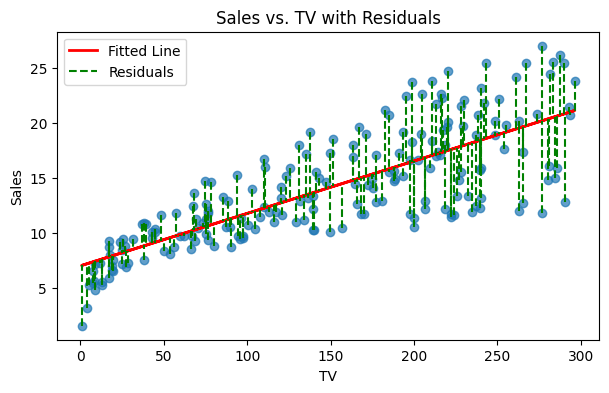

In [20]:
# plot a line b0 + b1 * adf['TV'] and the residuals
residuals = adf["sales"] - (b0 + b1 * adf["TV"])
plt.figure(figsize=(7, 4))
plt.scatter(adf["TV"], adf["sales"], alpha=0.7)
plt.plot(adf["TV"], b0 + b1 * adf["TV"], color  ='red', linewidth=2, label='Fitted Line')
plt.vlines(adf["TV"], adf["sales"], b0 + b1 * adf["TV"], color='green', linestyle='--', label='Residuals')
plt.xlabel("TV")     # label x-axis
plt.ylabel("Sales")  # label y-axis
plt.title("Sales vs. TV with Residuals")  # add a title
plt.legend()  # show legend
plt.show()

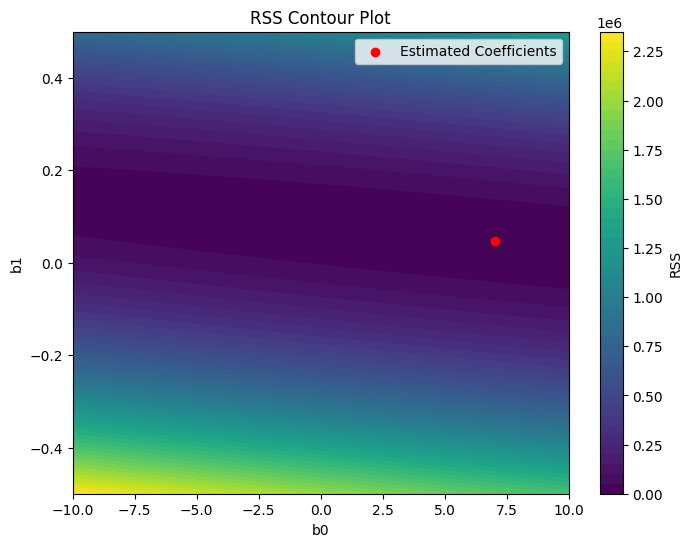

In [25]:
# vary b0 and b1 and compute RSS contour plot

def compute_rss(b0, b1):
    """Compute the Residual Sum of Squares (RSS) for given b0 and b1."""
    y_pred = b0 + b1 * adf["TV"]
    residuals = adf["sales"] - y_pred
    rss = np.sum(residuals ** 2)
    return rss
b0_values = np.linspace(-10, 10, 100)
b1_values = np.linspace(-0.5, 0.5, 100)
B0, B1 = np.meshgrid(b0_values, b1_values)
RSS = np.array([[compute_rss(b0, b1) for b0 in b0_values] for b1 in b1_values])
plt.figure(figsize=(8, 6))
plt.contourf(B0, B1, RSS, levels=50, cmap='viridis')
plt.colorbar(label='RSS')
plt.xlabel("b0")
plt.ylabel("b1")
plt.title("RSS Contour Plot")
plt.scatter(b0, b1, color='red', label='Estimated Coefficients')
plt.legend()
plt.show()

#### Accuracy of coefficient estimates

$Y = f(X) + \epsilon$ where $\epsilon$ is the mean zero random error term, we assume that the error term is independent of X

$Y = \beta_{0} + \beta_{1}X + \epsilon$ is the population regression line which is the best linear approximation to the true relationship between X and Y

In [68]:
# using 100 random Xs generate Y = 2 + 3X + e where e is a random gaussian error term
X = np.random.rand(100) * 4 - 2
e = np.random.randn(100) * 2
Y = 2 + 3 * X + e

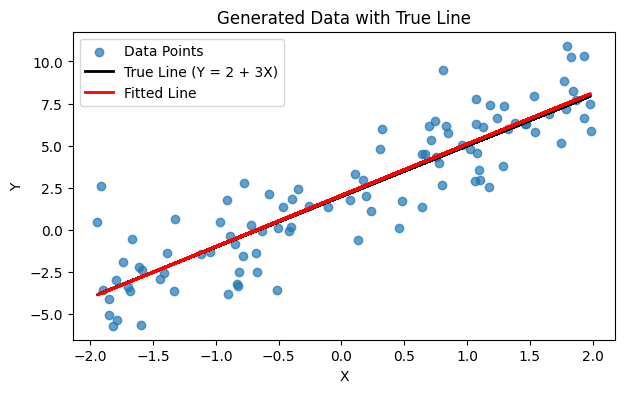

In [69]:
# plot the data and the fitted line
b1 = np.sum((X - X.mean()) * (Y - Y.mean())) / np.sum((X - X.mean()) ** 2)
b0 = Y.mean() - b1 * X.mean()

# plot line Y = 2+3X together with the data points
plt.figure(figsize=(7, 4))
plt.scatter(X, Y, alpha=0.7, label='Data Points')
plt.plot(X, 2 + 3 * X, color='black', linewidth=2, label='True Line (Y = 2 + 3X)')
plt.plot(X, b0 + b1 * X, color="red", linewidth=2, label="Fitted Line")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Generated Data with True Line")  
plt.legend()
plt.show()

In [70]:
b0, b1

(np.float64(2.0553266154651766), np.float64(3.0375438684739673))

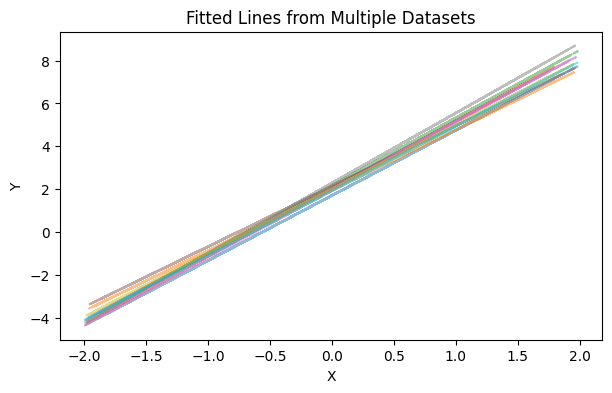

In [72]:
# generate multiple datasets and plot the fitted lines
num_datasets = 10
plt.figure(figsize=(7, 4))
for _ in range(num_datasets):
    X = np.random.rand(100) * 4 - 2
    e = np.random.randn(100) * 2
    Y = 2 + 3 * X + e
    b1 = np.sum((X - X.mean()) * (Y - Y.mean())) / np.sum((X - X.mean()) ** 2)
    b0 = Y.mean() - b1 * X.mean()
    plt.plot(
        X,
        b0 + b1 * X,
        "--",
        alpha=0.5,
    )
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Fitted Lines from Multiple Datasets")
plt.show()  

The estimated coefficients $\hat{\beta_0}$ and $\hat{\beta_1}$ won't be exactly equal to $\beta_0$ and $\beta_1$, but if we could average the estimates obtained over a huge number of datasets, then they would be the same.

We estimate the population mean of a random variable Y by $\mu$, how accurate is the sample mean $\hat{\mu}$ as an estimate of $\mu$? 
How far off will the single estimate of $\hat{\mu}$ be -> standard estimate of $\hat{\mu}$

$$
Var(\hat{\mu}) = SE(\hat{\mu})^2 = \frac{\sigma^2}{n}
$$

where $\sigma$ is the standard deviation of each of the realizations $y_i$ of Y. 

Similarly, standard errors associated with $\hat{\beta_0}$ and $\hat{\beta_1}$ are:

$$
SE(\hat{\beta_0})^2 = \sigma^2 * \bigl(\frac{1}{n} + \frac{\bar{x}^2}{\sum_{i=1}^{n}(x_i - \bar{x})^2}\bigr)
$$
$$
SE(\hat{\beta_1})^2 = \frac{\sigma^2}{\sum_{i=1}^{n}(x_i - \bar{x})^2}
$$

where $\sigma^2$ = Var($\epsilon$) and assuming that errors $\epsilon_i$ for each observation have common variance $\sigma^2$ and are uncorrelated

$\sigma^2$ is unknown but can be estimated from the data. $\sigma$ is known as the residual standard error and is given by $RSE = \sqrt{RSS/(n-2)}$

$SE(\hat{\beta_1})^2$ is smaller when the $x_i$ are more spread out as intuitively we have more leverage to estimate the slope

$SE(\hat{\beta_0})^2$ is the same as $SE(\hat{\mu})$ when $\hat{x}$ is zero(when $\hat{\beta_0}$ is equal to $\bar{y}$)

Standard errors can be used to compute confidence intervals. 95% confidence interval is defined as the range of values such that with 95% probability, the range will contain the true unknown value of the parameter. 

For linear regression, there is 95% chance that the interval

$$
[\hat{\beta_1} - 2 * SE(\hat{\beta_1}), \hat{\beta_1} + 2 * SE(\hat{\beta_1})]
$$

will contain the true value of $\beta_1$, similarly for $\beta_0$


#### Hypothesis tests

null hypothesis $H_0$: There is no relationship between X and Y, $\beta_1 = 0$

alternative hypothesis $H_a$: There is some relationship between X and Y, $\beta_1 \ne 0$

$\hat{\beta_1}$ should be sufficiently far from 0 to reject the null hypothesis, it depends on $SE(\hat{\beta_1})$

t-statistic is given by 

$$
t = \frac{\hat{\beta_1} - 0}{SE(\hat{\beta_1})}
$$

and it measures the number of standard deviations $\hat{\beta_1}$ is away from 0. If there is really no relationship between X and Y then we expect t to have t-distribution with n-2 degrees of freedom
 
p-value: probability of observing any number of equal to $|t|$ or larger in absolute value assuming $\beta_1$ = 0

a small p-value indicates that it is unlikely to observe such a substantial association between the predictor and the response due to chance

small p-value: reject the null hypothesis


In [76]:
# calculate p-values and summary for the coefficients
X = sm.add_constant(adf["TV"])  # add constant term for intercept
model = sm.OLS(adf["sales"], X).fit()  # fit the model
display(model.summary())
display(model.pvalues)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 22 Jul 2025   Prob (F-statistic):           1.47e-42
Time:                        17:28:51   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

const    1.406300e-35
TV       1.467390e-42
dtype: float64

#### Accuracy of the model

Residual standard error(RSE) is an estimate of the standard deviation of $\epsilon$, average amount that the response will deviate from the true regression line. It is measure of lack of fit of the model.

$$
RSE = \sqrt{\frac{RSS}{n-2}} = \sqrt{\frac{\sum_{i=1}^{n}(y_i - \hat{y_i})^2}{n-2}}
$$

$R^2$ statistic: proportion of variation explained

$$
R^2 = \frac{TSS-RSS}{TSS} = 1 - \frac{RSS}{TSS}
$$

where $TSS = \sum_{i=1}^{n}(y_i - \hat{y_i})^2$

TSS: measures total variance in the response Y

RSS: amount of variability that is left unexplained after performing the regression

TSS-RSS: amount of variability in the response that is explained by performing the regression

$R^2$: close to 1 indicates large proportion of the variability in the response is explained by regression

For simple linear regression, squared correlation and $R^2$ are identical

$$
Cor(X, Y) = \frac{\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n}(x_i - \bar{x})^2} \sqrt{\sum_{i=1}^{n}(y_i - \bar{y})^2}}
$$


In [79]:
# calculate RSE for sales vs tv, use the model fitted above
rss = np.sum((adf["sales"] - model.predict(X)) ** 2)
n = len(adf["sales"])
rse = np.sqrt(rss / (n - 2))  # n-2
print(f"Residual Sum of Squares (RSS): {rss:.2f}")
print(f"Number of observations (n): {n}")
print(f"Residual Standard Error (RSE): {rse:.2f}")


Residual Sum of Squares (RSS): 2102.53
Number of observations (n): 200
Residual Standard Error (RSE): 3.26


#### Multiple linear regression

$$
Y = \beta_0 + \beta_1X1 + \beta_2X2 + .... + \beta_pXp
$$

$$
RSS = \sum_{i=1}^{n}(y_i - \hat{y_i})^2 = \sum_{i=1}^{n}(y_i - \hat{\beta_0} - \hat{\beta_1}x_{i1} - \hat{\beta_2}x_{i2}......-\hat{\beta_p}x_{ip})^2
$$

The coefficients that minimize RSS are the multiple least squares regression coefficient estimates.

In [81]:
# using linear algebra estimate the coefficients of slaes vs tv, radio and newspaper
# beta = (X^T * X)^-1 * X^T * y
X = adf[["TV", "radio", "newspaper"]]
X = sm.add_constant(X)  # add constant term for intercept
y = adf["sales"]
coefficients = np.linalg.inv(X.T @ X) @ X.T @ y  # calculate coefficients using normal equation
coefficients

0    2.938889
1    0.045765
2    0.188530
3   -0.001037
dtype: float64

In [85]:
# use statsmodels to fit the model and get the coefficients
model = sm.OLS(y, X).fit()  # fit the model 
display(model.summary())  # display the summary of the model

# note that simple and multiple regression coefficients for the same predictor can be quite different

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 23 Jul 2025   Prob (F-statistic):           1.58e-96
Time:                        12:22:36   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

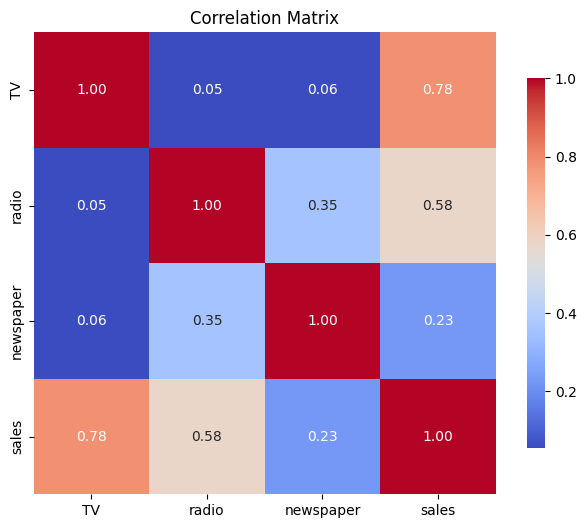

In [91]:
# correlation matrix, show values in the matrix
import seaborn as sns
correlation_matrix = adf.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Matrix")
plt.show()  

In the multiple regression case the coefficient of newspaper is not significant even though it was significant in the simple linear regression case.

Look at the corr(35%) between radio and newspaper, we can conclude that newspaper advertising is a surrogate for radio advertising.

Consider an example of regression of shark attacks vs ice cream sales that shows positive relationship(same as sales and newspaper). There is no (direct)relationship between ice cream sales and shark attacks, it can be explained by the more people visiting the beach, resulting in more ice cream sales and shark attacks.

##### Is there a relationship between the response and the predictors?

null hypothesis $H_0$: $\beta_0 = \beta_1 = \beta_2 = .... = \beta_p = 0$

altervative hypothesis $H_a$: at least one $\beta_j$ is non zero

F statistic:
$$
F = \frac{(TSS - RSS) / p}{RSS / (n - p - 1)}
$$

If the linear model assumptions are correct, $E[RSS/(n-p-1)] = \sigma^2$

If $H_0$ is true, $E[(TSS - RSS) / p] = \sigma^2$ and F is close to 1. On the other hand, if $H_a$ is true, $E[(TSS - RSS) / p] > \sigma^2$ and F is greater than 1.

When $H_0$ is true and the errors $\epsilon_i$ have a normal distribution, the F-statistic follows the F-distribution. Use the p-value associated with the F-statistic for a given n and p to determine whether or not to reject $H_0$.

To test whether a subset of q of the coefficients are zero, $H_0$: $\beta_{p-q+1}$ = $\beta_{p-q+2}$ = ..... = $\beta_{p}$ = 0

We fit a second model that uses all other predictors, except those q and the residual sum of squares for that model is $RSS_0$. Then the F-statistic to use is 
$F = \frac{(RSS_0 - RSS)/q}{RSS/(n - p - 1)}$

When the t-statistics are p-values for individual predictors are reported(these are adjusted for the other predictors), it is equivalent to the F-test that omits the single variable from the model leaving all others in, i.e. q = 1. 

If the p-values for any one of the individual variables is small, then it is not necessary that at least one of the predictors is related to the response(especially when p is large).


##### Deciding on important variables
possible that a subset of predictors are associated with the response, task of selecting important predictors: variable selection

trying all subsets: $2^p$ models


Forward selection: start with null model(contains only intercept and no predictors), then fit p simple linear regressions and add to the null model the variable that results in the lowest RSS, then add to the model the variable that results in the lowest RSS for the new two-variable model and so on, greedy approach and might include variables early that later become redundant

Backward selection: start with all the variables in the model and remove the one with the largest p-value, cannot be used when p > n

Mixed selection: combination of forward and backward selection, start with forward selection, at any point the p-value for one of the variables in the model rises above a certain threshold, remove that variable from the model

##### Model fit
RSE and $R^2$

In simple regression $R^2$ is the correlation of the response and the variable. In multiple linear regression, it equals $Cor(Y, \hat{Y})^2$

$R^2$ always increases when more variables are added to the regression, even though those variables are weakly associated with the response. This is because adding another variable always results in a decrease in the residual sum of squares on the training data(not necessarily on the testing data).

However RSE might increase even though new variables are added, this is because $RSE = \sqrt{\frac{RSS}{n-p-1}}$

##### Predictions

Uncertainities associated with the predictions

1. $\hat{\beta_0}$, $\hat{\beta_1}$, ... ,$\hat{\beta_p}$ are estimates for $\beta_0$, $\beta_1$, ... , $\beta_p$, i.e. the least squares plane $\hat{Y} = \hat{\beta_0} + \hat{\beta_1}X_1 +  ... + \hat{\beta_p}X_p$ is only an estimate for the true population regression plane $f(X) = \beta_0 + \beta_1X_1 + ... + \beta_pX_p$. The inaccuracy in the coefficient estimates is related to the reducible error. The confidence interval is used to determine how close $\hat{Y}$ will be to $f(X)$.
2. Assuming a linear model for f(X) is an approximation of reality, this is an additional source of potentially reducible error(model bias).
3. Even if the true values for $\beta_0$, $\beta_1$, ... $\beta_p$ are known, the response cannot be predicted perfectly because of the random error $\epsilon$ in the mode(irreducible error). How much will Y vary from $\hat{Y}$ -> use prediction intervals(wider than confidence interval).

We use the confidence interval to quantify the uncertainity surrounding the average sales over a large number of cities. However, prediction interval can be used to quantify the uncertainity surrounding sales for a particular city.

#### Qualitative Predictors

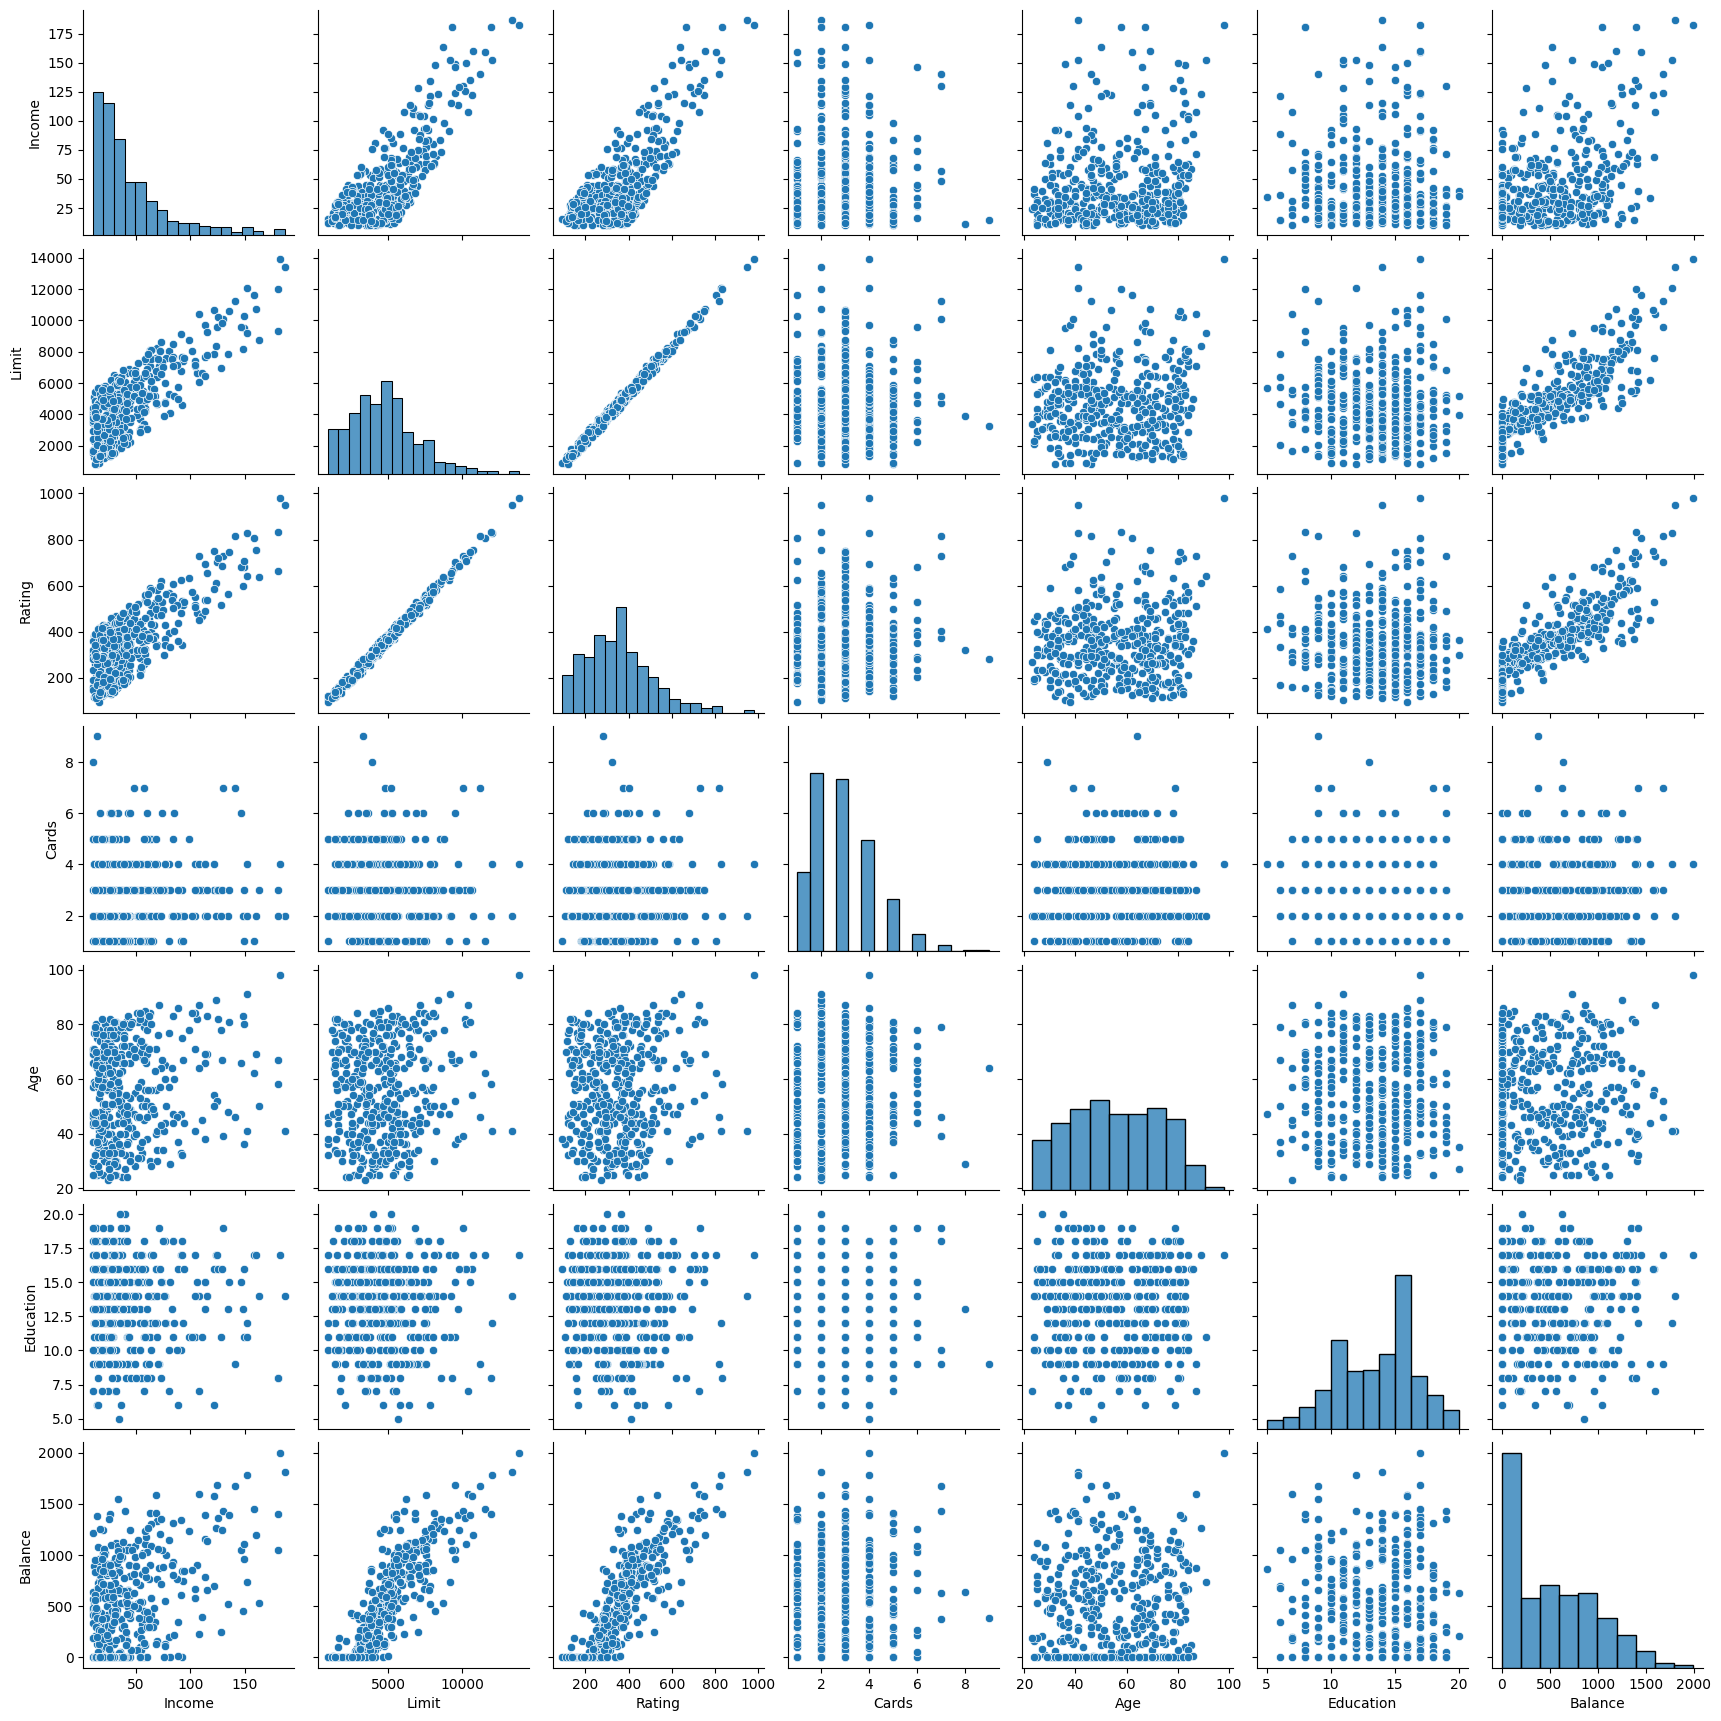

In [100]:
# scatter plot for all pairs of variables from credit data
cdf = load_data("Credit 2")
sns.pairplot(cdf)

##### qualitative predictor with two levels

balance vs owning house

$$
x_i =
\begin{cases}
1, & \text{if the $i$th person owns a house}, \\[6pt]
0, & \text{if the $i$th person does \emph{not} own a house}.
\end{cases}
$$


$$
y_i = \beta_0 + \beta_1x_i + \epsilon_i = 
\begin{cases}
\beta_0 + \beta_1 + \epsilon_i, & \text{if the $i$th person owns a house}, \\[6pt]
\beta_0 + \epsilon_i, & \text{if the $i$th person does \emph{not} own a house}.
\end{cases}
$$

$\beta_0$ can be interpreted as the average credit card balance among those who do not own, $\beta_0 + \beta_1$ as the average credit card balance among those who own their house, and $\beta_1$ as the average difference in credit card difference between owners and non-owners.


In [117]:
# from cdf regression of balance vs Own
X = sm.add_constant(cdf["Own"].map({"Yes": 1, "No": 0}))
y = cdf["Balance"]
model = sm.OLS(y, X).fit()  # fit the model
display(model.summary())  # display the summary of the model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.1836
Date:                Wed, 23 Jul 2025   Prob (F-statistic):              0.669
Time:                        17:20:11   Log-Likelihood:                -3019.3
No. Observations:                 400   AIC:                             6043.
Df Residuals:                     398   BIC:                             6051.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        509.8031     33.128     15.389      0.000     444.675     574.931
Own           19.7331     46.051      0.429      0.669     -70.801     110.267
==============================================================================
Omnibus:                       28.438   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.346
Skew:                           0.583   Prob(JB):                     1.15e-06
Kurtosis:                       2.471   Cond. No.                         2.66
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [118]:
# from cdf regression of balance vs Own
X = sm.add_constant(cdf["Own"].map({"Yes": 1, "No": -1}))
y = cdf["Balance"]
model = sm.OLS(y, X).fit()  # fit the model
display(model.summary())  # display the summary of the model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.1836
Date:                Wed, 23 Jul 2025   Prob (F-statistic):              0.669
Time:                        17:20:59   Log-Likelihood:                -3019.3
No. Observations:                 400   AIC:                             6043.
Df Residuals:                     398   BIC:                             6051.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        519.6697     23.026     22.569      0.000     474.403     564.937
Own            9.8666     23.026      0.429      0.669     -35.400      55.134
==============================================================================
Omnibus:                       28.438   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.346
Skew:                           0.583   Prob(JB):                     1.15e-06
Kurtosis:                       2.471   Cond. No.                         1.04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### qualitative predictor with more than two levels

$$
x_{i1} =
\begin{cases}
1, & \text{if the $i$th person is from the South},\\
0, & \text{otherwise},
\end{cases}
$$

$$
x_{i2} =
\begin{cases}
1, & \text{if the $i$th person is from the West},\\
0, & \text{otherwise}.
\end{cases}
$$

$$
y_i = \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \varepsilon_i
      =
\begin{cases}
\beta_0 + \beta_1 + \varepsilon_i, & \text{if the $i$th person is from the South},\\[6pt]
\beta_0 + \beta_2 + \varepsilon_i, & \text{if the $i$th person is from the West},\\[6pt]
\beta_0 + \varepsilon_i,           & \text{if the $i$th person is from the East}.
\end{cases}
$$

$\beta_0$ can be interpreted as the average credit card balance for individuals from the east, $\beta_1$ is the difference in average balance between people from South versus the East, $\beta_2$ is the difference in average balance between people from West versus the East 

In [127]:
# from cdf regression of balance vs region
X1 = cdf["Region"].map({"South": 1, "West": 0, "East": 0})
X2 = cdf["Region"].map({"West": 1, "East": 0, "South": 0})
X = pd.concat([X1, X2], axis=1)
X.columns = ["region[South]", "region[West]"]
X = sm.add_constant(X)
y = cdf["Balance"]
model = sm.OLS(y, X).fit()  # fit the model
display(model.summary())  # display the summary of the model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                   0.04344
Date:                Wed, 23 Jul 2025   Prob (F-statistic):              0.957
Time:                        17:30:06   Log-Likelihood:                -3019.3
No. Observations:                 400   AIC:                             6045.
Df Residuals:                     397   BIC:                             6057.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           531.0000     46.319     11.464      0.000     439.939     622.061
region[South]   -12.5025     56.681     -0.221      0.826    -123.935      98.930
region[West]    -18.6863     65.021     -0.287      0.774    -146.515     109.142
==============================================================================
Omnibus:                       28.829   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.395
Skew:                           0.581   Prob(JB):                     1.13e-06
Kurtosis:                       2.460   Cond. No.                         4.39
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Extensions of the linear model

Relationship between predictors and response are additive(association between a predictor $X_j$ and response Y does not depend on the values of other predictors) and linear(change in the response Y associated with a one unit change in $X_j$ is constant, regardless of the value of $X_j$).

##### Removing the additive assumption
interaction effect: spending half on TV and radio might be better than spending completely on either TV/radio for sales

standard linear regression model
$$
Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + \epsilon
$$

one unit increase in $X_1$ is associated with an average increase in Y of $\beta_1$ units, the presence of $X_2$ does not alter this statement

an interaction term can be added to the regression as follows:

$$
Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + \beta_3X_1X_2 + \epsilon
$$

for e.g.
$$
sales = \beta_0 + \beta_1 * TV + \beta_2 * radio + \beta_3 * TV * radio + \epsilon
\\
= \beta_0 + (\beta_1 + \beta_3 * radio) * TV + \beta_2 * radio + \epsilon
$$

$\beta_3$ can be interpreted as the increase in effectiveness of TV advertising associated with one unit increase i radio advertising(or vice versa)



In [129]:
# regression of sales vs tv, radio and tv*radio
X = adf[["TV", "radio"]].copy()
X["TV*radio"] = X["TV"] * X["radio"]
X = sm.add_constant(X)  # add constant term for intercept
y = adf["sales"]
model = sm.OLS(y, X).fit()  # fit the model
display(model.summary())  # display the summary of the model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Thu, 24 Jul 2025   Prob (F-statistic):          6.68e-146
Time:                        17:40:59   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.7502      0.248     27.233      0.000       6.261       7.239
TV             0.0191      0.002     12.699      0.000       0.016       0.022
radio          0.0289      0.009      3.241      0.001       0.011       0.046
TV*radio       0.0011   5.24e-05     20.727      0.000       0.001       0.001
==============================================================================
Omnibus:                      128.132   Durbin-Watson:                   2.224
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1183.719
Skew:                          -2.323   Prob(JB):                    9.09e-258
Kurtosis:                      13.975   Cond. No.                     1.80e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In the above case the interaction term has a small p-value and thus there is a strong evidence against $\beta_3 = 0$

According to the hierarchical principle, if we include the interaction term in a model, we should also include the main efffects, even if the p-value associated with their coefficients are not significant



Interaction between qualitative and quantitative variables

$$
\text{balance}_i \approx
\begin{cases}
(\beta_0 + \beta_2) + (\beta_1 + \beta_3)\,\text{income}_i, & \text{if the $i$th person is a student},\\
\beta_0 + \beta_1\,\text{income}_i,           & \text{if the $i$th person is not a student}.
\end{cases}
$$



In [132]:
# two regressions of balance vs income, student and their interaction from the cdf
X = cdf[["Income", "Student"]].copy()
X["Student"] = X["Student"].map({"Yes": 1, "No": 0})  # convert categorical variable to numerical
X["Stuent*Income"] = X["Student"] * X["Income"]  # interaction term
X = sm.add_constant(X)  # add constant term for intercept
y = cdf["Balance"]
model = sm.OLS(y, X).fit()  # fit the model for students
display(model.summary())  # display the summary of the model for non-students

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     51.30
Date:                Mon, 28 Jul 2025   Prob (F-statistic):           4.94e-28
Time:                        12:09:08   Log-Likelihood:                -2953.7
No. Observations:                 400   AIC:                             5915.
Df Residuals:                     396   BIC:                             5931.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           200.6232     33.698      5.953      0.000     134.373     266.873
Income            6.2182      0.592     10.502      0.000       5.054       7.382
Student         476.6758    104.351      4.568      0.000     271.524     681.827
Stuent*Income    -1.9992      1.731     -1.155      0.249      -5.403       1.404
==============================================================================
Omnibus:                      107.788   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.158
Skew:                           0.228   Prob(JB):                     1.54e-05
Kurtosis:                       1.941   Cond. No.                         309.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The slope for students is less than that for non students which suggests that increases in income are associated with smaller increases in credit card balances among non students compared to students

/var/folders/zl/k42qmcn14ng1njlgzdkrq3gw0000gn/T/ipykernel_34769/4168457010.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  student_0 = model.params[0] + model.params[1] * cdf["Income"] + model.params[2] * 0 + model.params[3] * 0
/var/folders/zl/k42qmcn14ng1njlgzdkrq3gw0000gn/T/ipykernel_34769/4168457010.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  student_1 = model.params[0] + model.params[1] * cdf["Income"] + model.params[2] * 1 + model.params[3] * cdf["Income"]


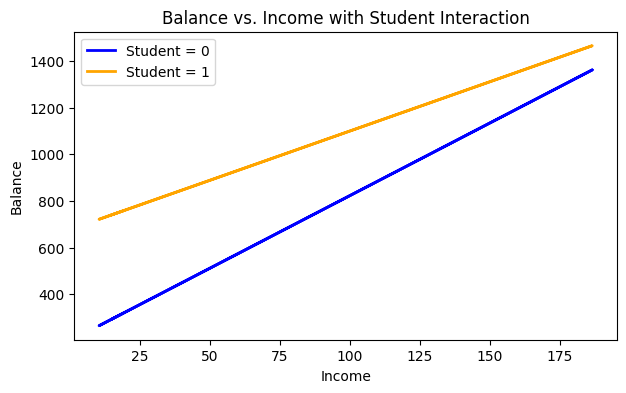

In [134]:
# plot lines when student = 0 and student = 1 using the coefficients from the model
plt.figure(figsize=(7, 4))
# plt.scatter(cdf["Income"], cdf["Balance"], alpha=0.7, label='Data Points')
student_0 = model.params[0] + model.params[1] * cdf["Income"] + model.params[2] * 0 + model.params[3] * 0
student_1 = model.params[0] + model.params[1] * cdf["Income"] + model.params[2] * 1 + model.params[3] * cdf["Income"]
plt.plot(cdf["Income"], student_0, color='blue', linewidth=2, label='Student = 0')
plt.plot(cdf["Income"], student_1, color='orange', linewidth=2, label='Student = 1')
plt.xlabel("Income")
plt.ylabel("Balance")
plt.title("Balance vs. Income with Student Interaction")
plt.legend()  # show legend
plt.show()

In [136]:
audf = load_data("Auto")
audf

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
ford mustang gl,27.0,4,140.0,86,2790,15.6,82,1
vw pickup,44.0,4,97.0,52,2130,24.6,82,2
dodge rampage,32.0,4,135.0,84,2295,11.6,82,1


Adding non linear relationships


model 1 summary:


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Mon, 28 Jul 2025   Prob (F-statistic):           7.03e-81
Time:                        12:30:28   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

model 2 summary:


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     428.0
Date:                Mon, 28 Jul 2025   Prob (F-statistic):           5.40e-99
Time:                        12:30:28   Log-Likelihood:                -1133.2
No. Observations:                 392   AIC:                             2272.
Df Residuals:                     389   BIC:                             2284.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           56.9001      1.800     31.604      0.000      53.360      60.440
horsepower      -0.4662      0.031    -14.978      0.000      -0.527      -0.405
horsepower^2     0.0012      0.000     10.080      0.000       0.001       0.001
==============================================================================
Omnibus:                       16.158   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.662
Skew:                           0.218   Prob(JB):                     2.20e-07
Kurtosis:                       4.299   Cond. No.                     1.29e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

model 3 summary:


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     177.4
Date:                Mon, 28 Jul 2025   Prob (F-statistic):           1.16e-97
Time:                        12:30:28   Log-Likelihood:                -1127.3
No. Observations:                 392   AIC:                             2267.
Df Residuals:                     386   BIC:                             2290.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -32.2306     28.574     -1.128      0.260     -88.411      23.950
horsepower       3.7001      1.303      2.840      0.005       1.139       6.262
horsepower^2    -0.0714      0.023     -3.170      0.002      -0.116      -0.027
horsepower^3     0.0006      0.000      3.206      0.001       0.000       0.001
horsepower^4 -2.281e-06   7.24e-07     -3.150      0.002   -3.71e-06   -8.57e-07
horsepower^5   3.33e-09   1.09e-09      3.068      0.002     1.2e-09    5.46e-09
==============================================================================
Omnibus:                       20.902   Durbin-Watson:                   1.113
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.260
Skew:                           0.305   Prob(JB):                     1.81e-09
Kurtosis:                       4.447   Cond. No.                     1.32e+13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.32e+13. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

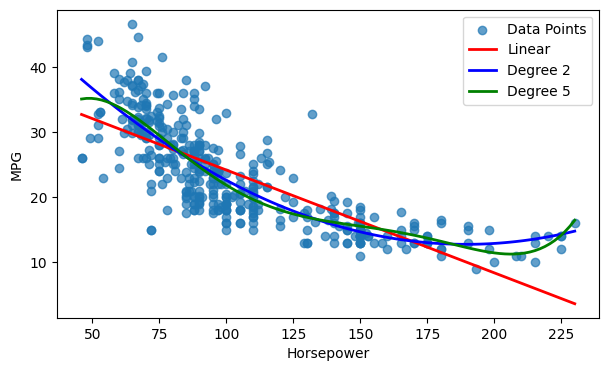

In [146]:
# regerssion of mpg vs horsepower and adding non linear relationships of horsepower^2 and upto horsepower^5 in separate regressions
# plot scatter plot of mpg vs horsepower and the regression lines in the same plot
X_1 = sm.add_constant(audf["horsepower"])  # add constant term for intercept
y_1 = audf["mpg"]
model_1 = sm.OLS(y_1, X_1).fit()  # fit the model
print("model 1 summary:")
display(model_1.summary())  # display the summary of the model

# add horsepower^2 and fit the model
X_2 = sm.add_constant(audf["horsepower"])
X_2["horsepower^2"] = audf["horsepower"] ** 2  # add horsepower^2 term
y_2 = audf["mpg"]
model_2 = sm.OLS(y_2, X_2).fit()  # fit the model
print("model 2 summary:")
display(model_2.summary())  # display the summary of the model

# add upto horsepower^5 and fit the model
X_3 = sm.add_constant(audf["horsepower"])
X_3["horsepower^2"] = audf["horsepower"] ** 2  # add horsepower^2 term
X_3["horsepower^3"] = audf["horsepower"] ** 3  # add horsepower^3 term
X_3["horsepower^4"] = audf["horsepower"] ** 4  # add horsepower^4 term
X_3["horsepower^5"] = audf["horsepower"] ** 5  # add horsepower^5 term
y_3 = audf["mpg"]
model_3 = sm.OLS(y_3, X_3).fit()  # fit the model
print("model 3 summary:")
display(model_3.summary())  # display the summary of the model

horsepower = np.linspace(audf["horsepower"].min(), audf["horsepower"].max(), 100)
X_1 = pd.DataFrame({"const": 1, "horsepower": horsepower})
y_1_pred = model_1.predict(X_1)

X_2 = pd.DataFrame({"const": 1, "horsepower": horsepower, "horsepower^2": horsepower**2})
y_2_pred = model_2.predict(X_2)

X_3 = pd.DataFrame(
    {
        "const": 1,
        "horsepower": horsepower,
        "horsepower^2": horsepower**2,
        "horsepower^3": horsepower**3,
        "horsepower^4": horsepower**4,
        "horsepower^5": horsepower**5,
    }
)
y_3_pred = model_3.predict(X_3)

plt.figure(figsize=(7, 4))
plt.scatter(audf["horsepower"], audf["mpg"], alpha=0.7, label="Data Points")
plt.plot(horsepower, y_1_pred, color="red", linewidth=2, label="Linear")
plt.plot(horsepower, y_2_pred, color="blue", linewidth=2, label="Degree 2")
plt.plot(horsepower, y_3_pred, color="green", linewidth=2, label="Degree 5")
plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.legend()  # show legend
plt.show()

#### Problems in Linear Regression

##### Non-linearity of data

residual plot, resuidual $e_i = y_i - \hat{y_i}$ vs predictor x_i$, in case of multiple linear regression, plot residuals vs the predicted values $\hat{y_i}$


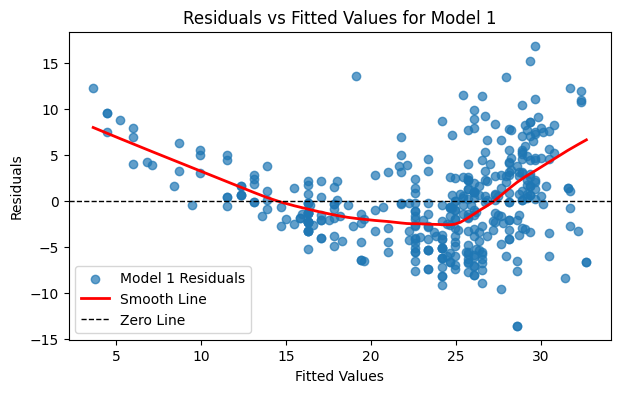

In [ ]:
# plot residuals vs the fitted values for the model_1
# plot a smooth line for the residuals

plt.figure(figsize=(7, 4))
plt.scatter(model_1.fittedvalues, model_1.resid, alpha=0.7, label="Model 1 Residuals")

# Fit a smooth line to the residuals
lowess = sm.nonparametric.lowess(model_1.resid, model_1.fittedvalues, frac=0.5)
plt.plot(lowess[:, 0], lowess[:, 1], color='red', linewidth=2, label='Smooth Line')
plt.axhline(0, color='black', linestyle='--', linewidth=1, label='Zero Line')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values for Model 1")
plt.legend()
plt.show()

In the above plot the residuals exhibit a clear U-shape which provides a strong indication of non-linearity in the data


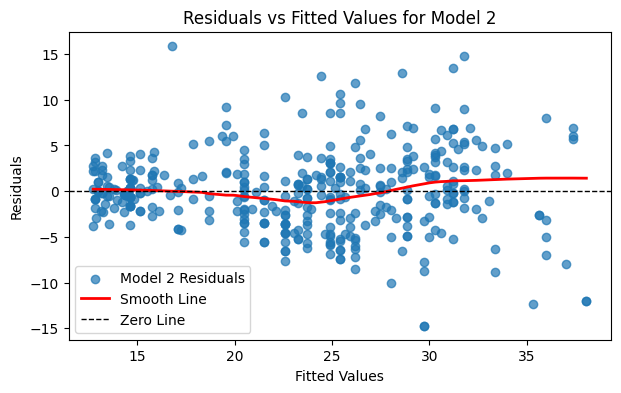

In [152]:
# plot residuals vs the fitted values for the model_2
# plot a smooth line for the residuals

plt.figure(figsize=(7, 4))
plt.scatter(model_2.fittedvalues, model_2.resid, alpha=0.7, label="Model 2 Residuals")

# Fit a smooth line to the residuals
lowess = sm.nonparametric.lowess(model_2.resid, model_2.fittedvalues, frac=0.5)
plt.plot(lowess[:, 0], lowess[:, 1], color="red", linewidth=2, label="Smooth Line")
plt.axhline(0, color="black", linestyle="--", linewidth=1, label="Zero Line")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values for Model 2")
plt.legend()

##### Correlation of error terms

An important assumption of linear regression is that the error terms $\epsilon_1, \epsilon_2, ... \epsilon_n$ are uncorrelated. The standard errors that are computed for the estimated regression coefficients or the fitted values are based on the assumption of uncorrelated error terms. If there is correlation amongst the error terms, then the estimated standard errors will tend to underestimate the true standard errors. As a result, the confidence intervals will be narrower than they should be.

For e.g. id the samples are doubled, the estimated parameters are the same, but the confidence intervals would be narrower by a factor of $\sqrt{2}$

Such correlations often occur in time series data, observations obtained at adjacent time points will have highly correlated errors. 

In [220]:
# generate time series data will some correlation rho between the error terms for adjacent time points

def generate_time_series_data(
    n=200, rho=0.6, beta0=1.0, beta1=0.05, sigma=1.0, seed=42
):
    rng = np.random.default_rng(seed)
    t = np.arange(n)

    # AR(1) errors: e_t = rho * e_{t-1} + sigma * z_t
    e = np.empty(n)
    # Stationary initialization so Corr(e_t, e_{t-1}) ≈ rho
    e0_std = sigma / np.sqrt(1 - rho**2) if abs(rho) < 1 else sigma
    e[0] = rng.normal(scale=e0_std)
    for i in range(1, n):
        e[i] = rho * e[i - 1] + rng.normal(scale=sigma)

    # Linear relation with correlated errors
    y = beta0 + beta1 * t + e
    df = pd.DataFrame({"Observation": t, "Y": y, "Error": e})

    # OLS fit (ignoring autocorrelation)
    X = sm.add_constant(t)
    ols = sm.OLS(y, X).fit()
    print(ols.summary())

    # Durbin–Watson to show residual autocorrelation
    dw = sm.stats.stattools.durbin_watson(ols.resid)
    print(f"Durbin–Watson: {dw:.3f}  (≈2=no autocorr, <2=positive autocorr)")

    # Residuals vs time: points + connecting line
    plt.figure(figsize=(7, 4))
    plt.plot(
        df["Observation"],
        ols.resid,
        marker="o",
        linestyle="-",
        alpha=0.7,
        label="Residuals",
    )
    plt.axhline(0, color="black", linestyle="--", linewidth=1)
    plt.xlabel("Observation")
    plt.ylabel("Residuals")
    plt.title(f"rho={rho}")
    plt.legend()
    plt.show()


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     293.7
Date:                Tue, 29 Jul 2025   Prob (F-statistic):           3.03e-31
Time:                        14:11:33   Log-Likelihood:                -114.85
No. Observations:                 100   AIC:                             233.7
Df Residuals:                      98   BIC:                             238.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1595      0.153      7.578      0.0

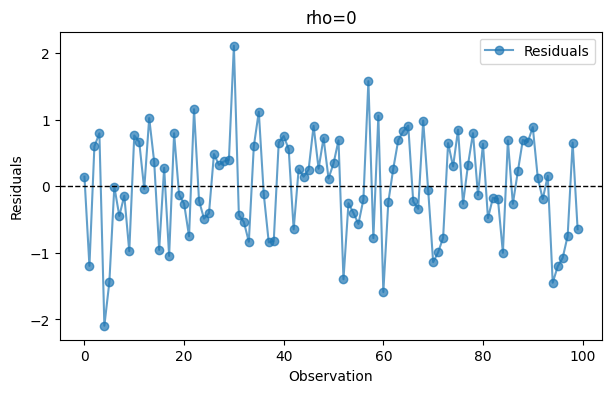

In [221]:
generate_time_series_data(n=100, rho=0)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     182.5
Date:                Tue, 29 Jul 2025   Prob (F-statistic):           4.14e-24
Time:                        14:11:41   Log-Likelihood:                -130.38
No. Observations:                 100   AIC:                             264.8
Df Residuals:                      98   BIC:                             270.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3025      0.179      7.289      0.0

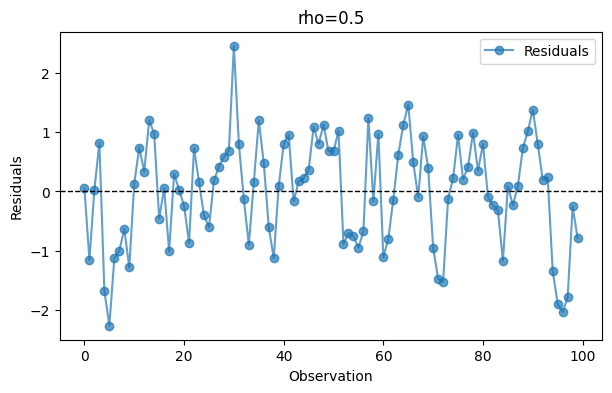

In [222]:
generate_time_series_data(n=100, rho=0.5)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.427
Method:                 Least Squares   F-statistic:                     74.74
Date:                Tue, 29 Jul 2025   Prob (F-statistic):           1.05e-13
Time:                        14:11:47   Log-Likelihood:                -156.66
No. Observations:                 100   AIC:                             317.3
Df Residuals:                      98   BIC:                             322.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6206      0.232      6.972      0.0

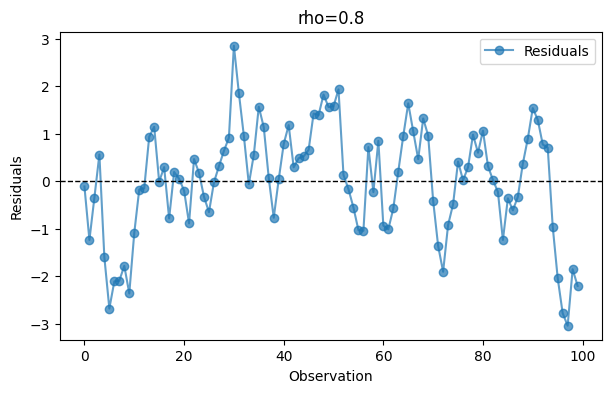

In [223]:
generate_time_series_data(n=100, rho=0.8)

##### Non constant variance of the error terms

Another important assumption of the linear regression model is that the error terms have a constant variance, $Var(\epsilon_i) = \sigma^2$, The standard errors, confidence intervals and hypothesis tests rely upon this assumption

Unfortunately, it is often the case that the variances of the error terms are non-constant. For instance, the variances of the error terms may increase with the value of the response. One can identify non-constant variances in the errors, or heteroscedasticity, from the presence of a funnel shape in the residual plot.


In [250]:
# generate data with non-constant variance of the error terms, increases with time
def generate_time_series_data_2(
    n=200, rho=0.6, beta0=100, beta1=0.1, sigma0=0.5, sigma1=0.02, seed=42, transform=False
):
    """
    Y_t = beta0 + beta1 * t + e_t
    e_t = s_t * u_t,  where u_t is AR(1) with Corr(u_t,u_{t-1})=rho and Var(u_t)=1
    s_t = sigma0 + sigma1 * |fitted_t|  (variance increases with fitted value)
    """
    rng = np.random.default_rng(seed)
    t = np.arange(n)

    # True mean and scale that grows with fitted value
    mu = beta0 + beta1 * t
    s = sigma0 + sigma1 * np.abs(mu)  # heteroskedastic scale tied to fitted value

    # AR(1) with unit variance: u_t = rho u_{t-1} + sqrt(1-rho^2) * z_t
    u = np.empty(n)
    u[0] = rng.normal()
    for i in range(1, n):
        u[i] = rho * u[i - 1] + np.sqrt(1 - rho**2) * rng.normal()

    e = s * u
    if not transform:
        y = mu + e
    else:
        y = np.log(mu + e)
    df = pd.DataFrame({"Time": t, "Y": y, "mu": mu, "scale": s, "u": u, "e": e})

    # OLS (ignoring autocorrelation/heteroskedasticity)
    X = sm.add_constant(t)
    ols = sm.OLS(y, X).fit()
    print(ols.summary())

    fitted = pd.Series(ols.fittedvalues)
    resid  = pd.Series(ols.resid)

    order = np.argsort(fitted.values)
    x_sorted = fitted.iloc[order].values
    r_sorted = resid.iloc[order].values
    
    # Rolling quantiles (window ~15% of sample, centered)
    win = max(15, int(0.15 * n))
    r_series = pd.Series(r_sorted)
    q05 = r_series.rolling(win, center=True, min_periods=win // 2).quantile(0.05)
    q95 = r_series.rolling(win, center=True, min_periods=win // 2).quantile(0.95)

    # LOWESS smooth the median and the quantile envelopes (drop NaNs at edges)
    med = sm.nonparametric.lowess(r_sorted, x_sorted, frac=0.4)
    idx05 = q05.notna()
    idx95 = q95.notna()
    low_q05 = sm.nonparametric.lowess(q05[idx05], x_sorted[idx05], frac=0.4)
    low_q95 = sm.nonparametric.lowess(q95[idx95], x_sorted[idx95], frac=0.4)

    # Plot residuals vs fitted with smooth quantile bands
    plt.figure(figsize=(7, 4))
    plt.scatter(fitted, resid, alpha=0.5, label="Residuals")
    plt.plot(med[:, 0], med[:, 1], linewidth=2, label="LOWESS median", color="red")
    plt.plot(low_q05[:, 0], low_q05[:, 1], linewidth=2, label="LOWESS 5%", color="black")
    plt.plot(low_q95[:, 0], low_q95[:, 1], linewidth=2, label="LOWESS 95%", color="black")
    plt.axhline(0, color="black", linestyle="--", linewidth=1)
    plt.xlabel("Fitted value")
    plt.ylabel("Residual")
    if not transform:
        plt.title(f"Heteroskedasticity increasing with fitted value (rho={rho}), response Y")
    else:
        plt.title(f"Heteroskedasticity increasing with fitted value (rho={rho}), response log(Y)")
    plt.legend()
    plt.show()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                 6.619e+04
Date:                Tue, 29 Jul 2025   Prob (F-statistic):               0.00
Time:                        14:26:52   Log-Likelihood:                -2684.1
No. Observations:                1000   AIC:                             5372.
Df Residuals:                     998   BIC:                             5382.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         99.9133      0.224    445.687      0.0

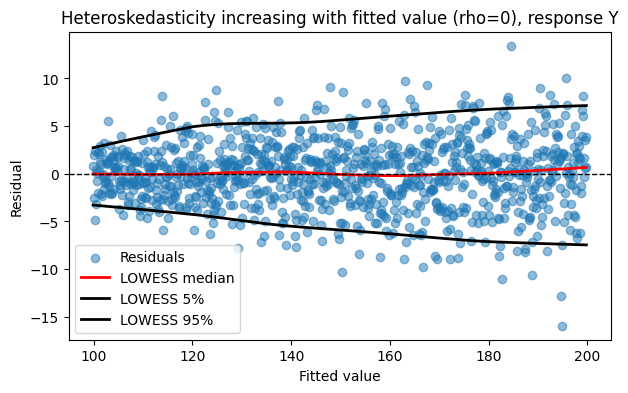

In [251]:
generate_time_series_data_2(1000, 0)

When faced with a problem like above(in which the magnitude of the residuals tends to increase with the fitted values), one possible solution is to transform the response Y using a concave function such as $log(Y)$ or $\sqrt{Y}$ . Such a transformation results in a greater amount of shrinkage of the larger responses, leading to a reduction in heteroscedasticity

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                 4.641e+04
Date:                Tue, 29 Jul 2025   Prob (F-statistic):               0.00
Time:                        14:26:56   Log-Likelihood:                 2125.2
No. Observations:                1000   AIC:                            -4246.
Df Residuals:                     998   BIC:                            -4237.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6493      0.002   2543.647      0.0

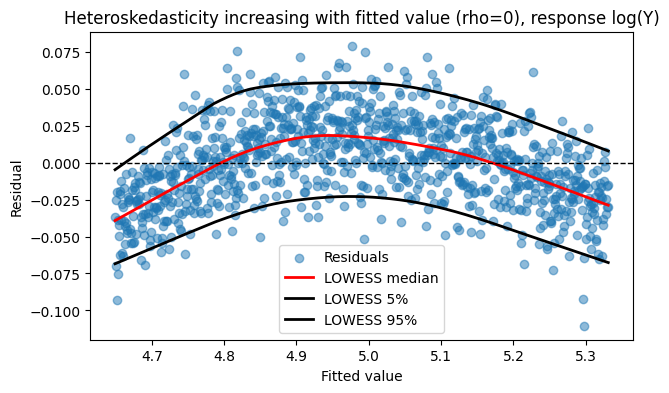

In [252]:
generate_time_series_data_2(1000, 0, transform=True)